topic:-StanderdScaler

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("Social_Network_Ads.csv")
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [15]:
df.drop('User ID', axis=1, inplace=True)
print(df)

     Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]


In [16]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})


In [18]:
print(df.head())

   Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0


# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

x = df.drop('Purchased', axis=1)
y = df["Purchased"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Applying StanderScaler

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled =  scaler.transform(x_test)

In [33]:
print(x_train_scaled)

[[-0.97785703  2.0052225   0.72479792]
 [ 1.02264438 -1.22740379 -1.43119212]
 [ 1.02264438  0.33993017 -0.33843005]
 [ 1.02264438 -0.93352867  0.54759326]
 [-0.97785703  0.43788855  0.28178627]
 [-0.97785703  0.43788855  1.10874135]
 [-0.97785703  0.82972204  0.75433203]
 [-0.97785703  0.92768041  1.2564119 ]
 [-0.97785703 -0.44373681 -1.25398746]
 [ 1.02264438 -1.81515402 -1.34258979]
 [ 1.02264438  1.12359715  0.54759326]
 [-0.97785703 -0.63965355 -1.63793089]
 [-0.97785703 -0.73761192  0.25225216]
 [ 1.02264438  1.02563878  2.08336699]
 [-0.97785703 -0.54169518  1.37454834]
 [-0.97785703 -0.05190332  0.01597928]
 [-0.97785703 -1.91311239  0.45899093]
 [-0.97785703  0.43788855  0.25225216]
 [-0.97785703 -1.03148704  0.39992271]
 [ 1.02264438  0.2419718  -0.16122538]
 [ 1.02264438  1.90726413  0.10458161]
 [-0.97785703 -1.12944541 -1.63793089]
 [-0.97785703 -1.12944541  0.28178627]
 [ 1.02264438 -0.8355703  -0.81097581]
 [-0.97785703 -0.44373681  2.31963987]
 [ 1.02264438  0.14401343

# Standardization:-

 1. Standardization:-
 Standardization, also know as z-score normalization, is a commonly used technique in feature scalin. it involves transforming the features in a datasets so that they have a mean of zero and a standard deviation of one.

 Mean = 0
 Stdv = 1 

X(new) = (X(i) - X(mean))/standard deviation


In [34]:
x_train_scaled = pd.DataFrame(data = x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(data = x_test_scaled, columns=x_train.columns)

In [36]:
np.round(x_train_scaled.describe(), 2)

,Gender,Age,EstimatedSalary
count,268.00,268.00,268.00
mean,-0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-0.98,-1.91,-1.64
25%,-0.98,-0.74,-0.78
50%,-0.98,-0.05,0.02
75%,1.02,0.73,0.52
max,1.02,2.20,2.35


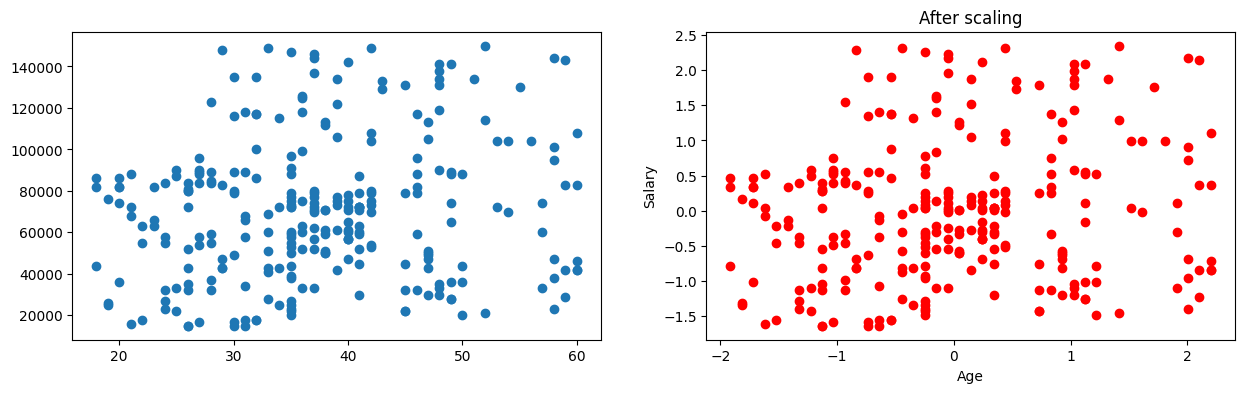

In [38]:
fig,(x1,x2) = plt.subplots(1,2, figsize=(15,4))
x1.scatter(x_train['Age'],x_train['EstimatedSalary'])
plt.title("before")
plt.title("After scaling")
plt.xlabel("Age")


x2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'], color='red')
plt.title("After scaling")
plt.xlabel("Age")
plt.ylabel("Salary")

plt.show()